<a href="https://colab.research.google.com/github/Rithi0106/FORECASTING-HOUSE-PRICES-DS-PROJECT/blob/main/Forcasting_houseprices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# For demonstration, using the California Housing dataset
df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
# Handle missing values
df = df.dropna()

# Feature engineering: create new features
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]

# Encode categorical variables
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Optional: Remove outliers (simple example)
for col in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    df = df[df[col] < df[col].quantile(0.99)]

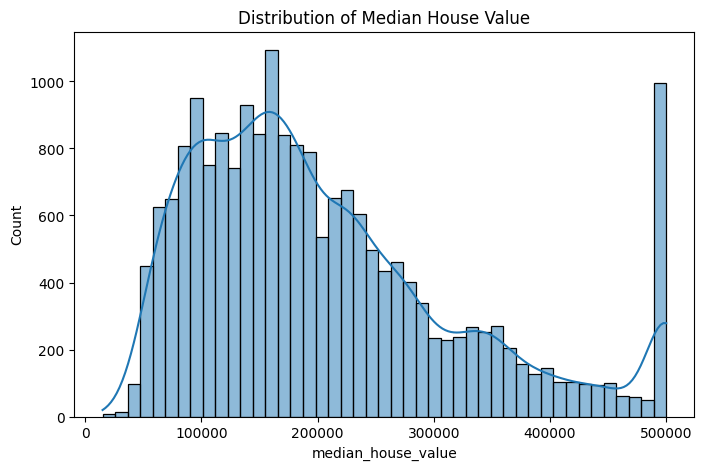

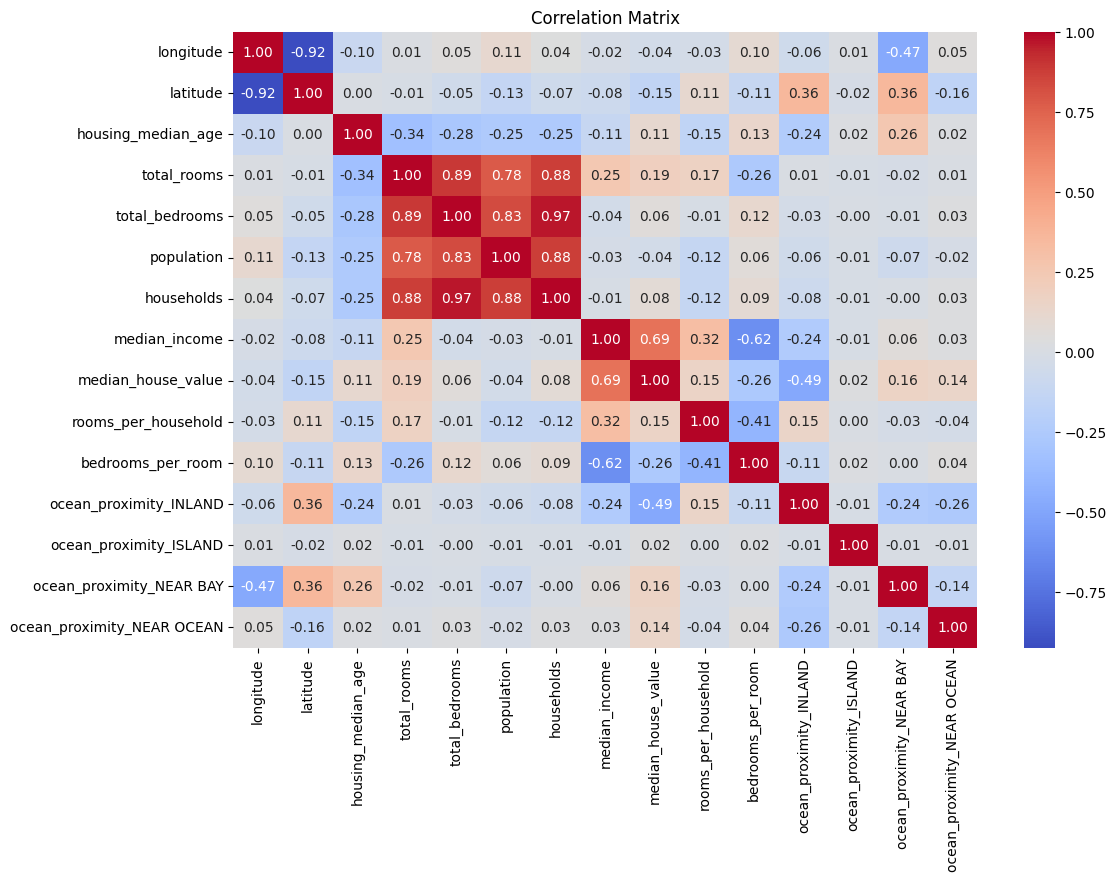

In [ ]:
# Distribution of target variable
plt.figure(figsize=(8,5))
sns.histplot(df['median_house_value'], kde=True)
plt.title('Distribution of Median House Value')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=0.5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}


Training Linear Regression...
Linear Regression Results:
RMSE: 66304.05
R²: 0.6639


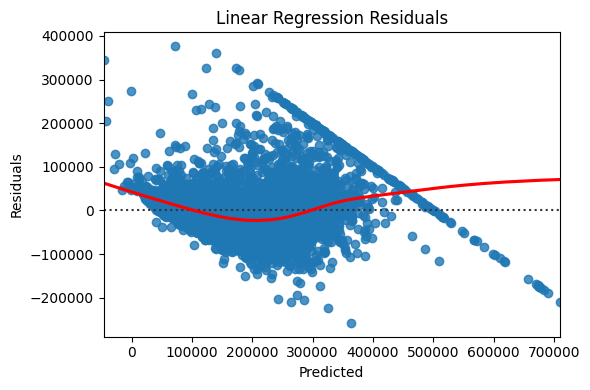


Training Lasso Regression...
Lasso Regression Results:
RMSE: 66304.05
R²: 0.6639


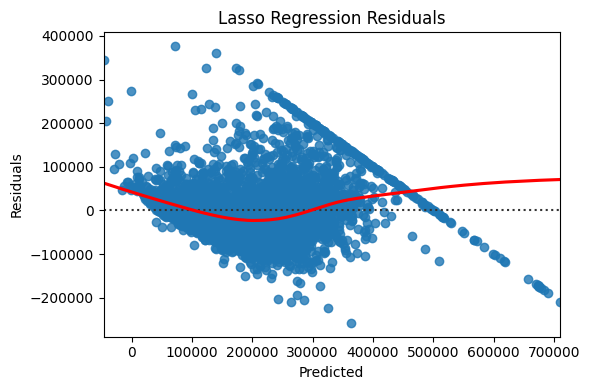


Training Ridge Regression...
Ridge Regression Results:
RMSE: 66304.12
R²: 0.6639


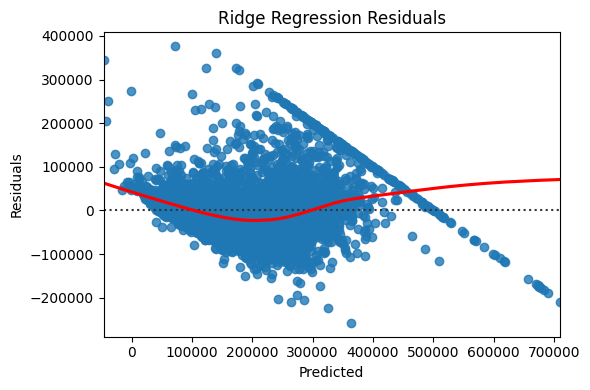


Training Random Forest...
Random Forest Results:
RMSE: 48999.48
R²: 0.8165


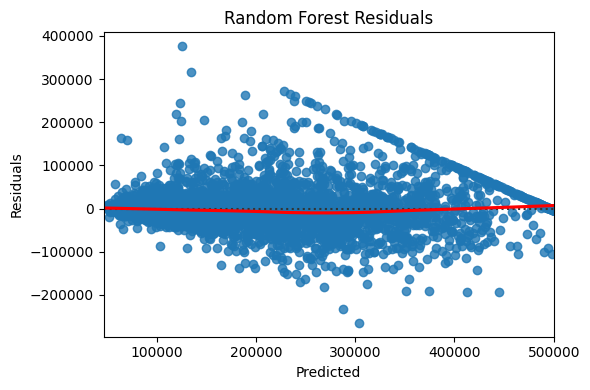

In [ ]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Results:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")
    # Save model
    joblib.dump(model, f'{name.replace(" ", "_")}_house_price.pkl')
    # Residual plot
    plt.figure(figsize=(6,4))
    sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red'})
    plt.title(f'{name} Residuals')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.tight_layout()
    plt.show()

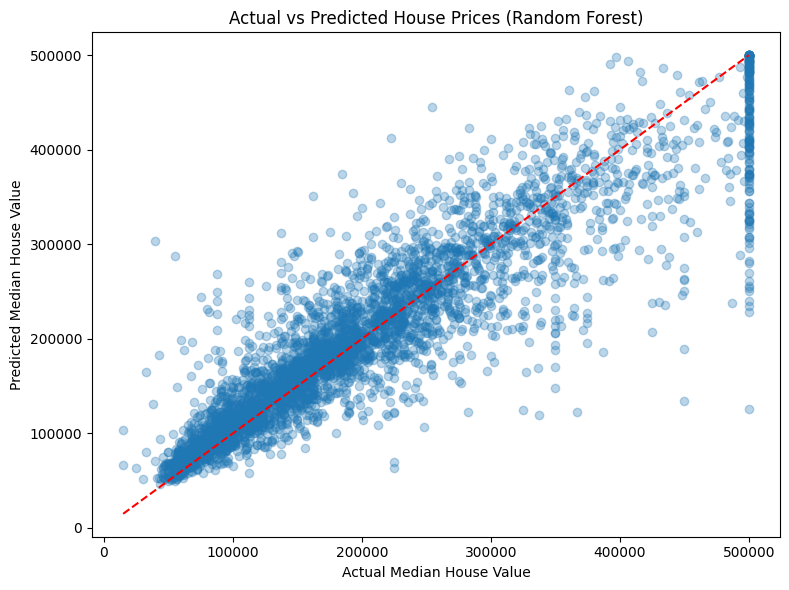

In [ ]:

best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_best, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted House Prices (Random Forest)')
plt.tight_layout()
plt.show()

In [ ]:
joblib.dump(scaler, 'house_price_scaler.pkl')

['house_price_scaler.pkl']